# Color Evaluation
In this notebook, we evaluate the CVCL model on our konkle object dataset that has been augmented with more colors.

## Part 1: Color Annotations
First, we read in the annotations for different colors. Each color corresponds to a separate csv file that contains annotations from multiple annotators.

In [231]:
import csv, os
from collections import defaultdict

COLORS_TEST = [
    "blue",
    "red",
    "yellow",
    "green",
    "brown",
    "orange",
    "pink",
    "purple"
]

color_to_images_dict = {}
all_images_with_annotations = []
image_to_colors_dict = defaultdict(list)

for c in COLORS_TEST:
    with open(f"annotations/Color Annotation - {c}.csv") as f:
        lines = csv.DictReader(f)
        lines = list(set([(l["annotator"], l["image_id"]) for l in lines])) # set to remove duplicates within one csv
        for i,l in enumerate(lines):
            if not l[1].endswith(".jpg"): # manually correct suffix for image id if annotators forget them
                lines[i] = (l[0], l[1]+".jpg")
        lines = [l for l in lines if os.path.isfile("konkle_objects_colored/"+l[1])] # remove 
        image_ids = [l[1] for l in lines]
        all_images_with_annotations += image_ids
        color_to_images_dict[c] = image_ids

        # populate image to colors dict
        for img in image_ids:
            if c not in image_to_colors_dict[img]:
                image_to_colors_dict[img].append(c)

all_images_with_annotations = list(set(all_images_with_annotations)) # remove duplicates
print(f"There are {len(all_images_with_annotations)} images that are annotated with at least one color.")

for key in color_to_images_dict:
    print(f"{key}: {len(set(color_to_images_dict[key]))} images.")

multiply_annotated_images = []
# print the file names of images that are marked with more than one color
for key in image_to_colors_dict:
    if len(image_to_colors_dict[key]) > 1:
        multiply_annotated_images.append(key)
        print(f"Image {key} has been annotated with: {' and '.join(image_to_colors_dict[key])}")


There are 447 images that are annotated with at least one color.
blue: 98 images.
red: 48 images.
yellow: 63 images.
green: 142 images.
brown: 34 images.
orange: 21 images.
pink: 53 images.
purple: 70 images.
Image packingtape_rot_s_10.jpg has been annotated with: blue and purple
Image extension_cord_s_8.jpg has been annotated with: blue and green
Image holy_vase_rot_s_4.jpg has been annotated with: blue and purple
Image watch_rot_s_3.jpg has been annotated with: blue and green
Image pail_rot_s_10.jpg has been annotated with: blue and purple
Image takeout_container_rot_s_5.jpg has been annotated with: blue and green
Image packingtape_rot_s_9.jpg has been annotated with: blue and purple
Image takeout_container_rot_s_6.jpg has been annotated with: blue and green
Image notebook_rot_s_6.jpg has been annotated with: red and brown
Image phone_antique_rot_s_10.jpg has been annotated with: red and pink
Image fuel_tank_rot_s_5.jpg has been annotated with: red and pink
Image holy_vase_rot_s_7.jp

## Part 2: Object Categories
We can find the mapping between object kind to a list of objects of that kind.

In [232]:
import os

folder_path = 'konkle_objects_colored' 
id_to_object = defaultdict(list)
object_to_id = {}
for fn in os.listdir(folder_path):
    if fn.lower().endswith(".jpg"):
        assert "_s_" in fn
        object_name = fn.split("_s_")[0]
        object_kind = int(fn.split("_s_")[1].split(".")[0]) % 2 # for images with the same prefix, even 
        object_id = object_name + str(object_kind)
        
        id_to_object[object_id].append(fn)

        object_to_id[fn] = object_id
    
for object_id in id_to_object:
    print(f"There are {len(id_to_object[object_id])} in {object_id}.")

There are 5 in tool_box_rot0.
There are 5 in valve_rot0.
There are 5 in extension_cord_rot1.
There are 5 in container_open_rot0.
There are 5 in truck_rot1.
There are 5 in handbag_rot0.
There are 5 in takeout_container_rot1.
There are 5 in cardboard_rot0.
There are 5 in theater_seats_rot1.
There are 5 in gloves_rot0.
There are 5 in sponge_rot0.
There are 5 in pail_rot1.
There are 5 in notebook_rot0.
There are 5 in razor_rot1.
There are 5 in notebook_rot1.
There are 5 in pail_rot0.
There are 5 in sponge_rot1.
There are 5 in gloves_rot1.
There are 5 in theater_seats_rot0.
There are 5 in fuel_tank_rot1.
There are 5 in cardboard_rot1.
There are 5 in takeout_container_rot0.
There are 5 in handbag_rot1.
There are 5 in container_open_rot1.
There are 5 in truck_rot0.
There are 5 in valve_rot1.
There are 5 in tape_dispenser_rot1.
There are 5 in sugar_bowl_rot0.
There are 5 in controlbox_rot0.
There are 5 in gift_box_rot1.
There are 5 in notecards_rot1.
There are 5 in notecards_rot0.
There are 5 

For the id_to_object dictionary, we remove image files that are not annotated with any color.

In [233]:
for object_id in id_to_object:
    id_to_object[object_id] = [fn for fn in id_to_object[object_id] if fn in all_images_with_annotations]


for object_id in id_to_object:
    print(f"There are {len(id_to_object[object_id])} in {object_id}.")

There are 5 in tool_box_rot0.
There are 4 in valve_rot0.
There are 5 in extension_cord_rot1.
There are 5 in container_open_rot0.
There are 4 in truck_rot1.
There are 4 in handbag_rot0.
There are 5 in takeout_container_rot1.
There are 5 in cardboard_rot0.
There are 5 in theater_seats_rot1.
There are 5 in gloves_rot0.
There are 5 in sponge_rot0.
There are 5 in pail_rot1.
There are 5 in notebook_rot0.
There are 5 in razor_rot1.
There are 5 in notebook_rot1.
There are 5 in pail_rot0.
There are 5 in sponge_rot1.
There are 5 in gloves_rot1.
There are 5 in theater_seats_rot0.
There are 5 in fuel_tank_rot1.
There are 5 in cardboard_rot1.
There are 5 in takeout_container_rot0.
There are 5 in handbag_rot1.
There are 5 in container_open_rot1.
There are 4 in truck_rot0.
There are 4 in valve_rot1.
There are 5 in tape_dispenser_rot1.
There are 5 in sugar_bowl_rot0.
There are 5 in controlbox_rot0.
There are 5 in gift_box_rot1.
There are 5 in notecards_rot1.
There are 5 in notecards_rot0.
There are 5 

## Part 3: Combining Color Annotations with Object Categories

Now that we have mappings between colors and images and between object categories and images, we can start to create our evaluation dataset.

Each data point is framed as a question, a set of choices, and the correct answer(s).

- When the question is a color text, the set of choices is a list of images. 
- When the question is an image, the set of choices is color terms. 

First, we generate the part where we give models a color text and ask it to choose between images of the same object kind but in different colors.

In [234]:
# check images that are annotated with multiple colors have unique color annotations in the object class. In other words
# we do not want two images in the same class that can both be classified as red
for obj_id in id_to_object:
    annotations = [image_to_colors_dict[fn] for fn in id_to_object[obj_id]]
    collapsed_annotations = sum(annotations, [])
    try:
        assert len(collapsed_annotations) == len(set(collapsed_annotations))
    except:
        AssertionError(print(annotations))
        # AssertionError(print(list(zip(annotations, id_to_object[obj_id]))))

[['green'], ['blue'], ['blue'], ['red', 'pink']]
[['green'], ['red', 'brown'], ['purple'], ['purple'], ['yellow', 'green']]
[['yellow'], ['green'], ['red', 'pink'], ['blue'], ['pink']]
[['blue'], ['yellow'], ['green'], ['blue']]
[['yellow', 'orange'], ['blue', 'green'], ['pink'], ['purple'], ['green']]
[['purple'], ['pink'], ['green'], ['orange'], ['yellow', 'green']]
[['pink'], ['red', 'brown'], ['blue'], ['green'], ['blue']]
[['red', 'pink'], ['green'], ['green'], ['purple'], ['blue']]
[['pink'], ['green'], ['orange'], ['yellow', 'green'], ['blue']]
[['blue'], ['purple'], ['green'], ['red', 'brown'], ['green']]
[['red'], ['purple'], ['yellow', 'green'], ['blue'], ['green']]
[['purple'], ['green'], ['green'], ['blue'], ['red', 'brown']]
[['orange'], ['pink'], ['yellow', 'green'], ['blue', 'purple'], ['green']]
[['blue'], ['red', 'pink'], ['green'], ['green'], ['purple']]
[['brown'], ['blue'], ['blue'], ['pink'], ['green']]
[['pink'], ['purple'], ['green'], ['orange'], ['yellow', 'gree

In [235]:
from collections import Counter
data = []
for obj_id in id_to_object:
    annotations = [image_to_colors_dict[fn] for fn in id_to_object[obj_id]]
    image_and_gold_annotation_pairs = [(fn, image_to_colors_dict[fn]) for fn in id_to_object[obj_id]]

    one_to_one = True
    no_overlap = True

    if len(set(sum(annotations, []))) != len(sum(annotations, [])): # if there are overlap of colors:
        no_overlap = False
    
    # colors that appear more than once
    counts = Counter(sum(annotations, []))
    duplicates = [item for item, count in counts.items() if count > 1]
    
    for a in annotations:
        if len(a) != 1:
            one_to_one = False
            break
    
    if one_to_one and no_overlap:
        for fn, g in image_and_gold_annotation_pairs:
            d = {}
            
            d["question"] = g[0]
            d["choices"] = id_to_object[obj_id] # all files under this obj_id can be choices
            d["correct"] = [fn]
            d["type"] = 0 # given color term choose image
            data.append(d)

    elif not one_to_one and no_overlap: # multiple annotations for one image but there is no overlap of colors between images:
        for fn, gs in image_and_gold_annotation_pairs:
            for g in gs:
                d = {}

                d["question"] = g
                d["choices"] = id_to_object[obj_id]
                d["correct"] = [fn]
                d["type"] = 0
                data.append(d)

    elif not no_overlap: # if there is overlap
        assert len(duplicates) >= 1
        for color in counts.keys():
            d = {}
            d["question"] = color
            d["choices"] = id_to_object[obj_id]
            d["correct"] = [fn for fn in d["choices"] if color in image_to_colors_dict[fn]] # if current question color exists in the annotations list
            d["type"] = 0
            data.append(d)           
        
        


print(f"This part of the dataset contains {len(data)} items.")

This part of the dataset contains 454 items.


Second, we generate the part where we give models an image and a set of color terms to choose from.

In [236]:
print(f"The dataset size is {len(data)}.")
for image_fn in all_images_with_annotations:
    d = {}
    d["question"] = image_fn
    d["choices"] = COLORS_TEST
    d["correct"] = image_to_colors_dict[image_fn]
    d["type"] = 1
    data.append(d)

print(f"The dataset size is {len(data)}.")

import pandas as pd
data_df = pd.DataFrame(data)
data_df.to_csv("color_evaluation_dataset.csv", index=False)


The dataset size is 454.
The dataset size is 901.


## Part 4: Evaluation

We now run the CVCL model on our dataset.

In [237]:
import torch
from multimodal.multimodal_lit import MultiModalLitModel

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print("Loading model...")
cvcl, preprocess = MultiModalLitModel.load_model(model_name="cvcl")
cvcl = cvcl.to(device)
cvcl.eval()

Loading model...


/Users/mirandazhu/anaconda3/envs/schuster/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:244: UserWarning: Attribute 'vision_encoder' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['vision_encoder'])`.
  rank_zero_warn(
/Users/mirandazhu/anaconda3/envs/schuster/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:244: UserWarning: Attribute 'text_encoder' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['text_encoder'])`.
  rank_zero_warn(


MultiModalLitModel(
  (vision_encoder): VisionEncoder(
    (model): ResNet(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stat

In [238]:
from torchvision import transforms
from PIL import Image
import torch.nn.functional as F

# encoding images
normalizer = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # normalize each channel

preprocess = transforms.Compose([
            transforms.Resize((224, 224),
                              interpolation=transforms.InterpolationMode.BICUBIC),
            transforms.ToTensor(),
            normalizer,
        ])
vocab_dict = cvcl.vocab

In [259]:
import numpy as np 
from tqdm import tqdm
import random

for d in tqdm(data):
    scores = [[] for i in d["choices"]]

    if d["type"] == 0: # one text, multiple images
        text = torch.tensor([vocab_dict[d["question"]]]).unsqueeze(0).to(device)
        text_len = torch.tensor([len(text)], dtype=torch.long).to(device)
        text_features, _ = cvcl.model.encode_text(text, text_len) # size = 1 by 512

        for j, fn in enumerate(d["choices"]):
            I = preprocess(Image.open(f"konkle_objects_colored/{fn}").convert('RGB')).unsqueeze(0).to(device)
            image_features, _ = cvcl.model.encode_image(I)
            print(image_features, image_features.size())
            break
            distance_score = F.pairwise_distance(image_features, text_features, p=2).item() # the smaller the closer
            scores[j] = distance_score


    elif d["type"] == 1: # one image, multiple texts
        I = preprocess(Image.open(f"konkle_objects_colored/{d['question']}").convert('RGB')).unsqueeze(0).to(device)
        image_features, _ = cvcl.model.encode_image(I)

        for j, color_term in enumerate(d["choices"]):
            text = torch.tensor([vocab_dict[color_term]]).unsqueeze(0).to(device)
            text_len = torch.tensor([len(text)], dtype=torch.long).to(device)
            text_features, _ = cvcl.model.encode_text(text, text_len) # size = 1 by 512
            distance_score = F.pairwise_distance(image_features, text_features, p=2).item() # the smaller the closer
            scores[j] = distance_score
    break

    # if len(d["correct"]) == 1:
    #     model_response_idx = np.argmin(scores)
    #     if model_response_idx == d["choices"].index(d["correct"][0]):
    #         d["accuracy"] = 1
    #     else:
    #         d["accuracy"] = 0
    # else:
    #     correct_choices_index = [d["choices"].index(content) for content in d["correct"]]
    #     average_distance_for_correct_choices = sum(scores[i] for i in correct_choices_index) / len(correct_choices_index)
    #     wrong_choices_index = [d["choices"].index(content) for content in d["choices"] if content not in d["correct"]]
    #     assert len(set(correct_choices_index+wrong_choices_index)) == len(correct_choices_index) + len(wrong_choices_index) # assert disjoint
    #     average_distance_for_incorrect_choices = sum(scores[i] for i in wrong_choices_index) / len(wrong_choices_index)
    #     if average_distance_for_correct_choices < average_distance_for_incorrect_choices:
    #         d["accuracy"] = 1
    #     else:
    #         d["accuracy"] = 0
    model_response_idx = np.argmin(scores)
    d["model_response"] = model_response_idx
    # random_response_idx = random.choice(list(range(len(d["choices"]))))
    # d["random_response"] = random_response_idx
    baseline = len(d["correct"])/len(d["choices"])
    d["accuracy_baseline"] = baseline

    correct_indices = []
    for correct_ans in d["correct"]:
        correct_indices.append(d["choices"].index(correct_ans))
    if model_response_idx in correct_indices:
        d["accuracy"] = 1
    else:
        d["accuracy"] = 0
    # if random_response_idx in correct_indices:
    #     d["accuracy_baseline"] = 1
    # else:
    #     d["accuracy_baseline"] = 0    





  0%|          | 0/901 [00:00<?, ?it/s]

tensor([[-0.0316,  0.0410,  0.0112, -0.0588,  0.0039,  0.0318, -0.0039, -0.0107,
          0.0598, -0.0294, -0.0438,  0.0216, -0.0101,  0.0280, -0.0767,  0.0260,
          0.0690,  0.0104, -0.0658,  0.0317, -0.0033, -0.0415, -0.0267,  0.0526,
          0.0485,  0.0012, -0.0343,  0.0389, -0.0348, -0.1257, -0.0290,  0.0008,
          0.0162,  0.0455,  0.0727, -0.0179, -0.0099, -0.0163, -0.0137,  0.0235,
         -0.0428,  0.0582,  0.0170, -0.0556,  0.0244, -0.0072,  0.0048,  0.0403,
          0.0105, -0.0182,  0.0300,  0.0090,  0.0764,  0.0659, -0.0369, -0.0302,
          0.0173, -0.0602,  0.0424, -0.0393,  0.0624, -0.0501,  0.0007,  0.0044,
         -0.0396, -0.0363,  0.0197, -0.0182,  0.0401,  0.0698,  0.0420,  0.0161,
         -0.0334, -0.0232, -0.0370, -0.0184, -0.1032,  0.0220,  0.0719, -0.0394,
         -0.0007,  0.0101, -0.0392, -0.0066, -0.0361,  0.0333, -0.0599,  0.0566,
          0.0803, -0.0397, -0.0097, -0.0538,  0.0103,  0.0074,  0.0444,  0.0502,
         -0.0770, -0.0439,  

In [252]:
data_accuracy_df = pd.DataFrame(data)
data_accuracy_df.to_csv("color_evaluation_dataset_with_accuracy_updated_measure_and_baseline.csv", index=False)

## Part 5: Visualization
We now visualize the accuracy results.

In [253]:
data_accuracy_df.columns

Index(['question', 'choices', 'correct', 'type', 'model_response',
       'random_response', 'accuracy', 'accuracy_baseline'],
      dtype='object')

In [254]:
import matplotlib.pyplot as plt

print(f"Overall accuracy is: {sum(data_accuracy_df['accuracy'])/len(data_accuracy_df['accuracy'])}")

type0_df = data_accuracy_df[data_accuracy_df['type'] == 0]
type1_df = data_accuracy_df[data_accuracy_df['type'] == 1]
print(f"Overall accuracy for type 0 questions is: {sum(type0_df['accuracy'])/len(type0_df['accuracy'])}")
print(f"Overall accuracy for type 1 questions is: {sum(type1_df['accuracy'])/len(type1_df['accuracy'])}")


Overall accuracy is: 0.1709211986681465
Overall accuracy for type 0 questions is: 0.2621145374449339
Overall accuracy for type 1 questions is: 0.07829977628635347


Let us look at type 0 questions first.

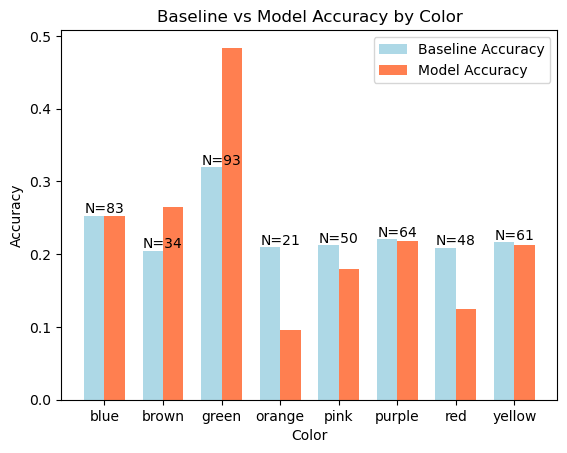

In [255]:
grouped_data = type0_df.groupby('question')[['accuracy', 'accuracy_baseline']].mean().reset_index()
counts = type0_df["question"].value_counts().reindex(grouped_data["question"]).values

###### PLOT WITH BASELINE #####
bar_width = 0.35
index = np.arange(len(grouped_data['question']))

# Create bar plots
fig, ax = plt.subplots()
bar1 = ax.bar(index, grouped_data['accuracy_baseline'], bar_width, label='Baseline Accuracy', color='lightblue')
bar2 = ax.bar(index + bar_width, grouped_data['accuracy'], bar_width, label='Model Accuracy', color='coral')

for bar, count in zip(bar1, counts):
    plt.text(bar.get_x() + bar.get_width() , bar.get_height(), f'N={count}', 
                ha='center', va='bottom', fontsize=10)

# Add labels, title, and legend
ax.set_xlabel('Color')
ax.set_ylabel('Accuracy')
ax.set_title('Baseline vs Model Accuracy by Color')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(grouped_data['question'])
ax.legend()

# Show plot
plt.show()

###### OLD PLOT #######
# plt.figure(figsize=(8, 4))

# bars = plt.bar(grouped_data["question"], grouped_data['accuracy'])

# # Add labels for the number of items on top of each bar
# for bar, count in zip(bars, counts):
#     plt.text(bar.get_x() + bar.get_width() , bar.get_height(), f'N={count}', 
#                 ha='center', va='bottom', fontsize=10)

# # Add labels and title
# plt.xlabel("Color")
# plt.ylabel('Accuracy')
# plt.title(f'Accuracy by color')
# plt.xticks(rotation=45)  # Rotate labels if needed

# # Display the plot
# plt.tight_layout()
# plt.show()

Now let us look at type 1 questions.

In [256]:
type1_df["kind"] = type1_df["question"].map(object_to_id)
type1_df.head()

/var/folders/p5/4f2jvjd16dzcqk4v24z60cpm0000gn/T/ipykernel_57113/1625770199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type1_df["kind"] = type1_df["question"].map(object_to_id)


,question,choices,correct,type,model_response,random_response,accuracy,accuracy_baseline,kind
454,packingtape_rot_s_1.jpg,"[blue, red, yellow, green, brown, orange, pink...",[green],1,5,1,0,0.125,packingtape_rot1
455,chapstick_rot_s_5.jpg,"[blue, red, yellow, green, brown, orange, pink...",[yellow],1,5,1,0,0.125,chapstick_rot1
456,jug_rot_s_8.jpg,"[blue, red, yellow, green, brown, orange, pink...",[orange],1,1,6,0,0.125,jug_rot0
457,fuel_tank_rot_s_8.jpg,"[blue, red, yellow, green, brown, orange, pink...",[blue],1,5,0,0,0.125,fuel_tank_rot0
458,gloves_rot_s_9.jpg,"[blue, red, yellow, green, brown, orange, pink...",[brown],1,5,6,0,0.125,gloves_rot1


In [257]:
grouped_data = type1_df.groupby("kind")[['accuracy', 'accuracy_baseline']].mean().reset_index()
# grouped_data = grouped_data[grouped_data['accuracy'] > 0] # only look at those ones with non zero accuracy
sorted_df = grouped_data.sort_values(by='accuracy',ascending=False)
sorted_df["accuracy_higher_than_baseline"] = (sorted_df["accuracy"] > sorted_df["accuracy_baseline"]).astype(int)
sorted_df
# print(f"Percentage of kinds that surpass the baseline: {sorted_df['accuracy_higher_than_baseline'].mean()}")
# sorted_df.to_csv("color_evaluation_accuracy_given_kind_pick_color.csv")

,kind,accuracy,accuracy_baseline,accuracy_higher_than_baseline
86,umbrella_rot1,0.50,0.1875,1
42,jug_rot1,0.40,0.1250,1
92,watch_rot1,0.25,0.1875,1
81,towel_rot0,0.25,0.1250,1
23,fakeapple_rot0,0.25,0.1250,1
...,...,...,...,...
55,packingtape_rot0,0.00,0.1750,0
56,packingtape_rot1,0.00,0.1750,0
11,chapstick_rot0,0.00,0.1500,0
58,pail_rot1,0.00,0.1500,0


In [258]:
print(f"Percentage of kinds that surpass the baseline: {sorted_df['accuracy_higher_than_baseline'].mean()}")

Percentage of kinds that surpass the baseline: 0.3548387096774194


# Part 6: Confusion Matrix
[TODO]